# Filters and Bode Plots

A linear circuit or system can be understood by its transfer function $H(s)$. 


### Some Setup Routines / Programming

In [1]:
# lets standardize the frequency axis and collect the plotting commands in one function
%pylab inline
f=logspace(0,7,1000)
s=1j*2*pi*f

def bode(H,title_text):
    Hdb=20*log10(abs(H))
    semilogx(f,Hdb)
    xlabel('Frequency (Hz)')
    ylabel('Gain (dB)')
    grid(True)
    ylim(min(Hdb)-5,max(Hdb)+5)
    title(title_text)

Populating the interactive namespace from numpy and matplotlib


Note: both MATLAB and Python/Scipy have a built in bode() function which do something similar but more systems-oriented.

## Low Pass Filters

This is a standard LPF with a standard gain of 0 dB in the passband and a cutoff frequency of 1 kHz.

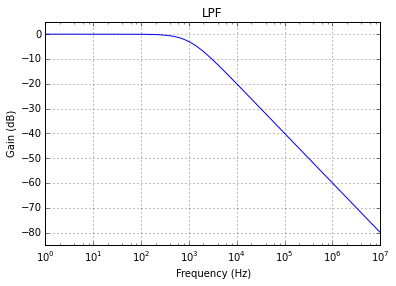

In [2]:
bode ( 1 / (1 + s/(2*pi*1000)) , 'LPF')

---------

Here is the same LPF with an alternative way of writing $H(s)$

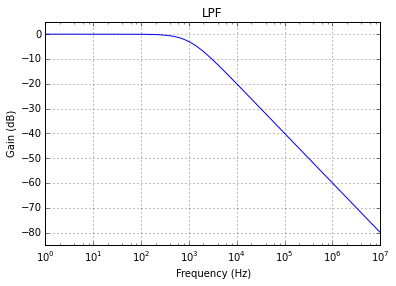

In [3]:
a=2*pi*1000
bode ( a/(s+a) , 'LPF')

## High Pass Filters

This HPF has a passband gain of 0 dB and a cutoff frequency of 1 kHz.

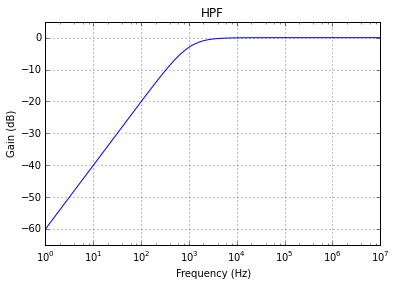

In [4]:
bode( s/(s+2*pi*1000) ,'HPF')

-----

This HPF has a passband gain of 6 dB and a cutoff frequency of 0.1 kHz.

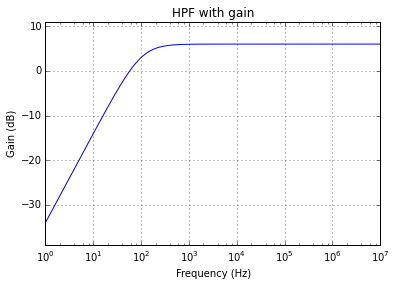

In [5]:
bode( 2*s / (s+2*pi*100) , 'HPF with gain')

## Bandpass Filters

The simplest bandpass filter is created by combining a lowpass filter and a highpass filter in cascade, so that the resulting transfer function is

$$H(s) = H_{LPF}(s) H_{HPF}(s) = \frac{a}{s+a}\frac{s}{s+b}$$

In this equation, $a$ is the end-of-the-passband frequency and $b$ is the start-of-the-passband frequency.

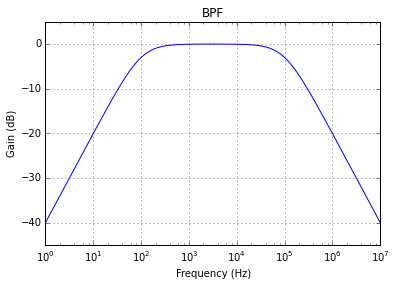

In [6]:
f_start=100
f_end  =100000
a=2*pi*f_end
b=2*pi*f_start

H=a/(s+a) * s / (s+b)
bode (H, 'BPF')

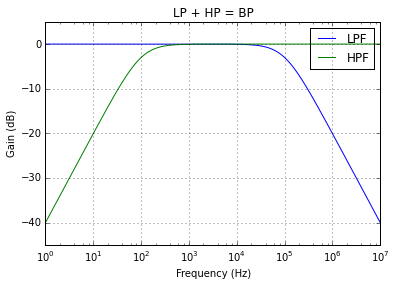

In [7]:
# Alternative:
H_lp = a/(s+a)
H_hp = s/(s+b)
bode(H_lp,'')
bode(H_hp,'LP + HP = BP')
legend(('LPF','HPF'));

## Filters with complex roots (resonance)

With certain combinations of inductors and/or capacitors, the polynomials of $H(s)$ can have complex roots, in which case a new behavior called *resonance* results. 

Here is an example:

In [18]:
wc=10000
B=2000

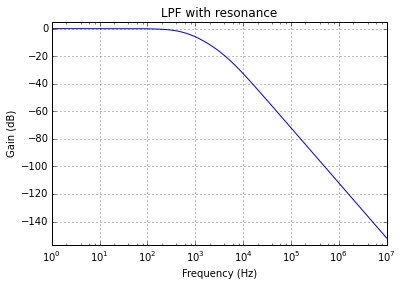

In [17]:
bode ( wc**2 / (s**2 + B*s+ wc**2),'LPF with resonance')

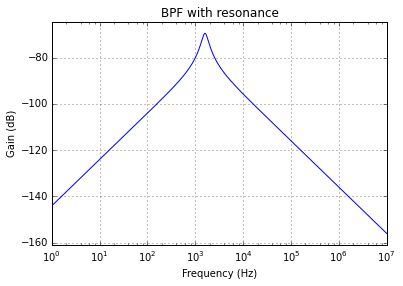

In [11]:
bode ( s/(s**2 + B*s + wc**2), 'BPF with resonance')

When the middle parameter "B" is small, the roots of the polynomial are complex, 
which means that for some values of j\omega, the denominator can become small.